In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import astropy
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_body
import astropy.units as u
from augerscalerpy.scaler_cleaning import scaler_clean, plot_data
from augerscalerpy.plot_config import configure_plots
from augerscalerpy.scaler_fft import scalerfft_period, scalerfft_frec

In [2]:
scaler300s = scaler_clean('scaler_300s_FINAL.csv')
scaler300s

,Date,ScalerCorr,errmean,arrmean,SDinmean,pressure
0,2005-12-31 23:59:46,1604.310000,0.226024,1555.812279,584,857.586
1,2006-01-01 00:04:46,1659.087559,0.184573,1555.812279,555,857.690
2,2006-01-01 00:09:46,1604.690000,0.221103,1555.812279,548,857.790
3,2006-01-01 00:14:46,1604.730000,0.220782,1555.812279,545,857.893
4,2006-01-01 00:19:46,1602.570000,0.210147,1555.812279,551,857.995
...,...,...,...,...,...,...
1533050,2021-09-30 18:34:46,1665.460000,0.166624,1555.812279,544,856.860
1533051,2021-09-30 18:39:46,1665.100000,0.179557,1555.812279,549,856.860
1533052,2021-09-30 18:44:46,1666.210000,0.215630,1555.812279,542,856.815
1533053,2021-09-30 18:49:46,1661.490000,0.378396,1555.812279,287,856.770


### Filtro de frecuencia por suavizado

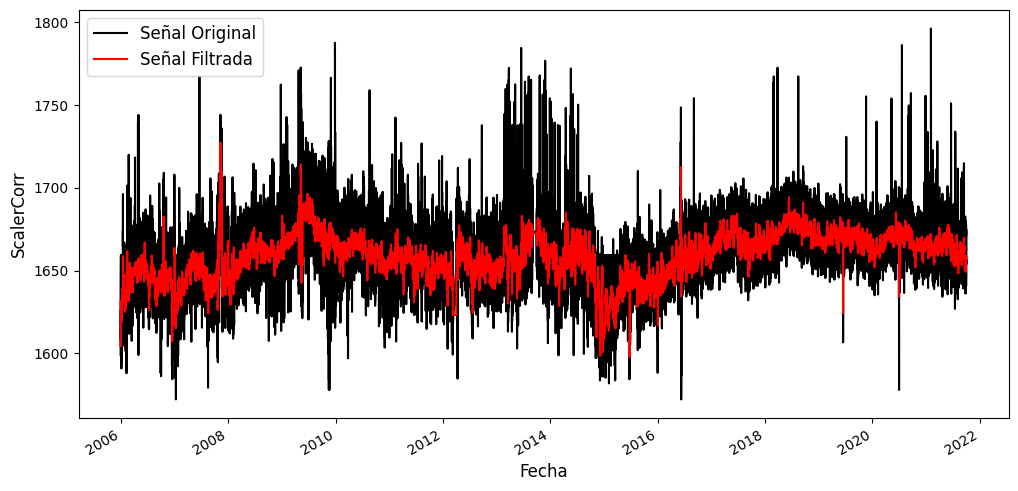

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

configure_plots()
# Tu DataFrame original
# scaler300s = ...

# Frecuencia de muestreo
sample_rate = 1 / 300  # Muestreo cada 300 segundos

# Periodo que deseas eliminar (1 día)
period_to_remove = 1  # En días

# Tamaño de la ventana del filtro de promedio móvil
window_size = int(period_to_remove * 24 * 3600 / 300)  # Convertir el período a segundos y luego al número de puntos de datos

# Aplicar el filtro de promedio móvil
filtered_signal = scaler300s['ScalerCorr'].rolling(window=window_size, min_periods=1).mean()

# Crear un nuevo DataFrame con la señal filtrada
scaler_smooth = scaler300s.copy()
scaler_smooth['ScalerCorr'] = filtered_signal

# Gráfico de la señal original y filtrada
plt.figure(figsize=(12, 6))
plt.plot(scaler300s['Date'], scaler300s['ScalerCorr'], label='Señal Original', color='black')
plt.plot(scaler_smooth['Date'], scaler_smooth['ScalerCorr'], label='Señal Filtrada', color='red')
plt.xlabel('Fecha')
plt.ylabel('ScalerCorr')
plt.legend()
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

#### Comparemos un Forbush con y sin filtrado:

In [4]:
forbush_auger = pd.read_csv('forbush_events/FD_type1_PIERRE_AUGER_2006-2021.csv')
forbush_auger = forbush_auger[['date', 'MagnM','Otype','Qs']]
#forbush_auger.set_index('date', inplace=True)

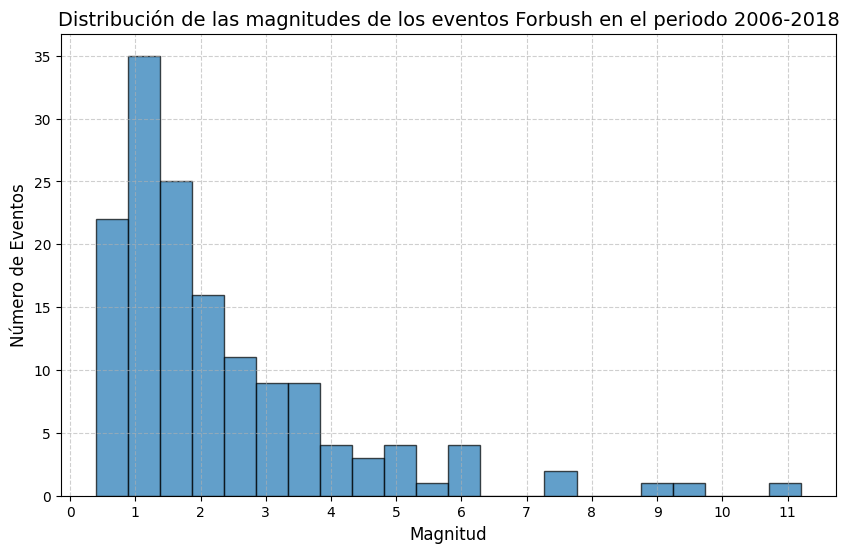

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes el DataFrame 'forbush_auger'
# forbush_auger = ...

# Definir el ancho de bin
bin_width = 0.5

# Calcular el número de bins
min_magnitude = forbush_auger['MagnM'].min()
max_magnitude = forbush_auger['MagnM'].max()
num_bins = int((max_magnitude - min_magnitude) / bin_width) + 1

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(forbush_auger['MagnM'], bins=num_bins, edgecolor='black', alpha=0.7)
plt.xlabel('Magnitud')
plt.ylabel('Número de Eventos')
plt.title('Distribución de las magnitudes de los eventos Forbush en el periodo 2006-2018')
plt.grid(True, linestyle='--', alpha=0.6)

# Configurar los ticks del eje x para mostrar valores de 1 en 1
xticks = np.arange(int(min_magnitude), int(max_magnitude) + 1, step=1)
plt.xticks(xticks)
# Etiquetas de los bins con el número de eventos
#hist, bin_edges = np.histogram(forbush_auger['MagnM'], bins=num_bins)
#for i, value in enumerate(hist):
#    plt.text(bin_edges[i], value, str(value), ha='center', va='bottom')

plt.show()


In [6]:
filtered_forbush_auger = forbush_auger.loc[forbush_auger['MagnM'] >= 6]
filtered_forbush_auger

,date,MagnM,Otype,Qs
4,2006-12-14 14:14:00,9.6,1,5.0
49,2012-03-08 11:03:00,11.2,1,5.0
57,2012-07-14 18:09:00,7.6,1,4.0
104,2014-12-21 19:11:00,6.0,1,4.0
114,2015-06-22 18:33:00,9.1,1,4.0
139,2017-09-07 23:00:00,7.7,1,5.0


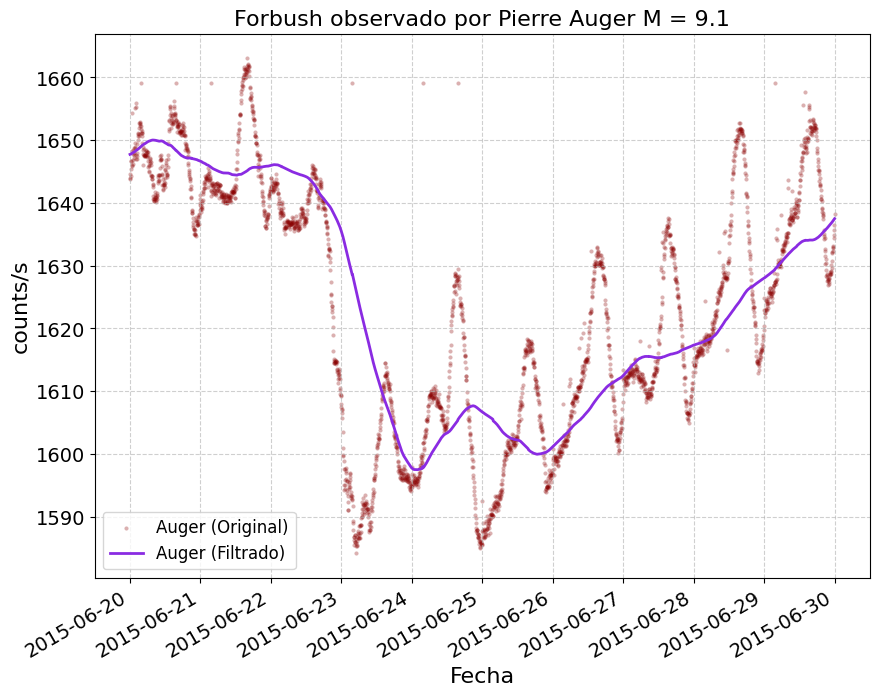

In [7]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2015-06-20"
end_date = "2015-06-30"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))


plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=16)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=16)  # Nombre del eje vertical con fuente más grande
plt.title('Forbush observado por Pierre Auger M = 9.1', fontsize=16)
plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()


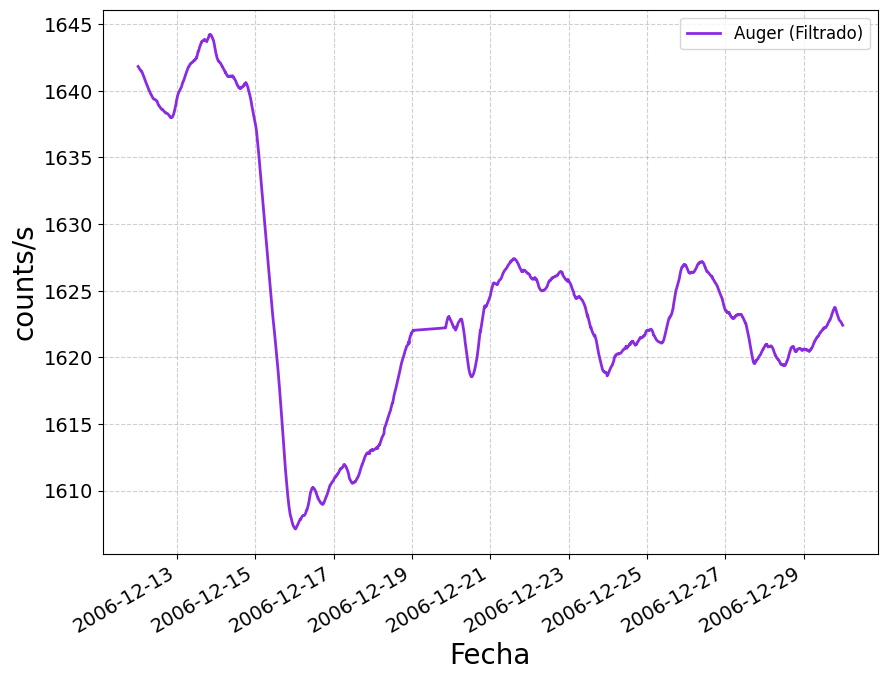

In [8]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2006-12-12"
end_date = "2006-12-30"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=20)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=20)  # Nombre del eje vertical con fuente más grande

plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()


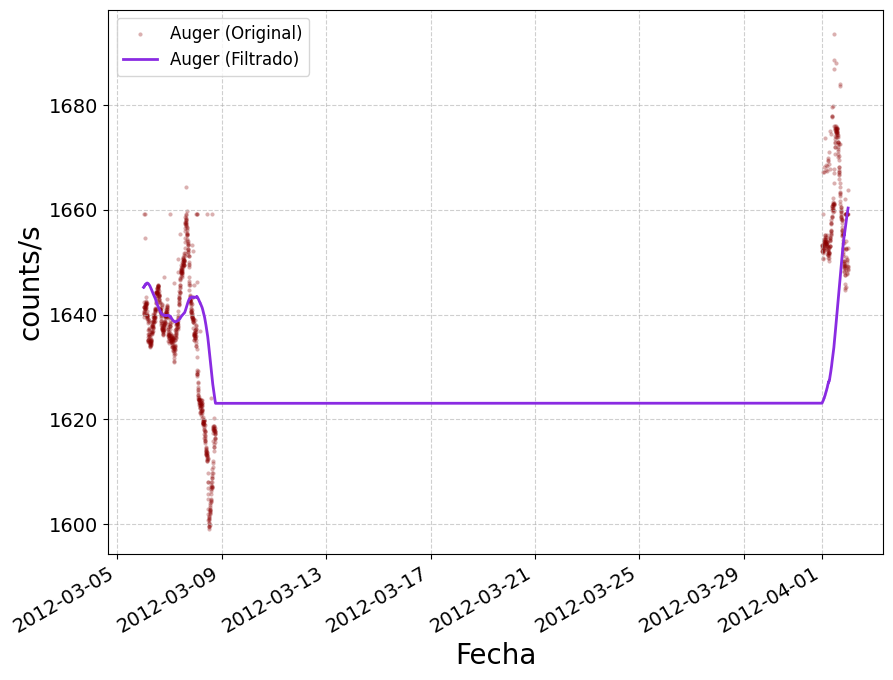

In [9]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2012-03-06"
end_date = "2012-04-02"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=20)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=20)  # Nombre del eje vertical con fuente más grande

plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

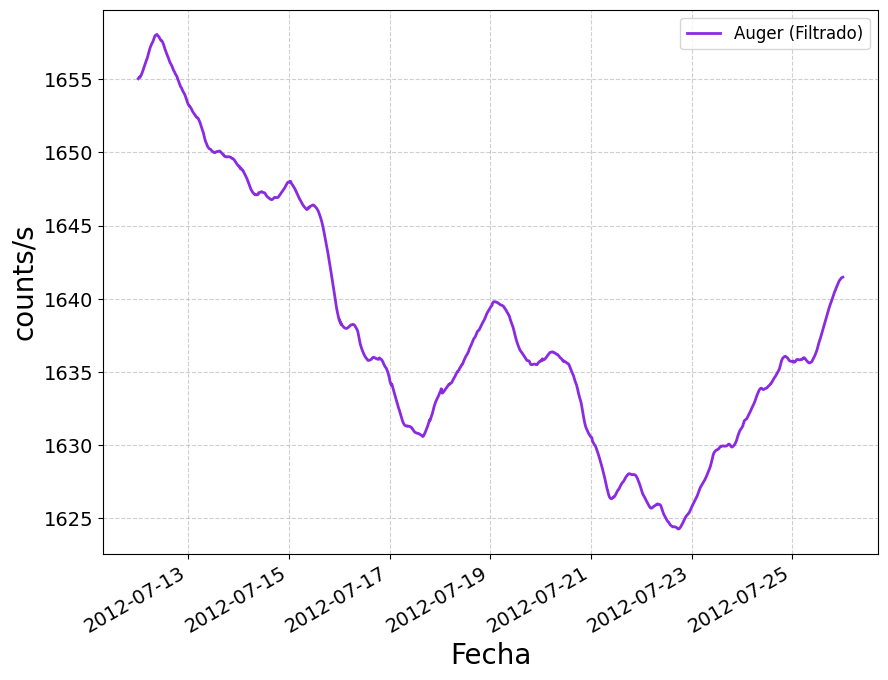

In [10]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2012-07-12"
end_date = "2012-07-26"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=20)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=20)  # Nombre del eje vertical con fuente más grande

plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

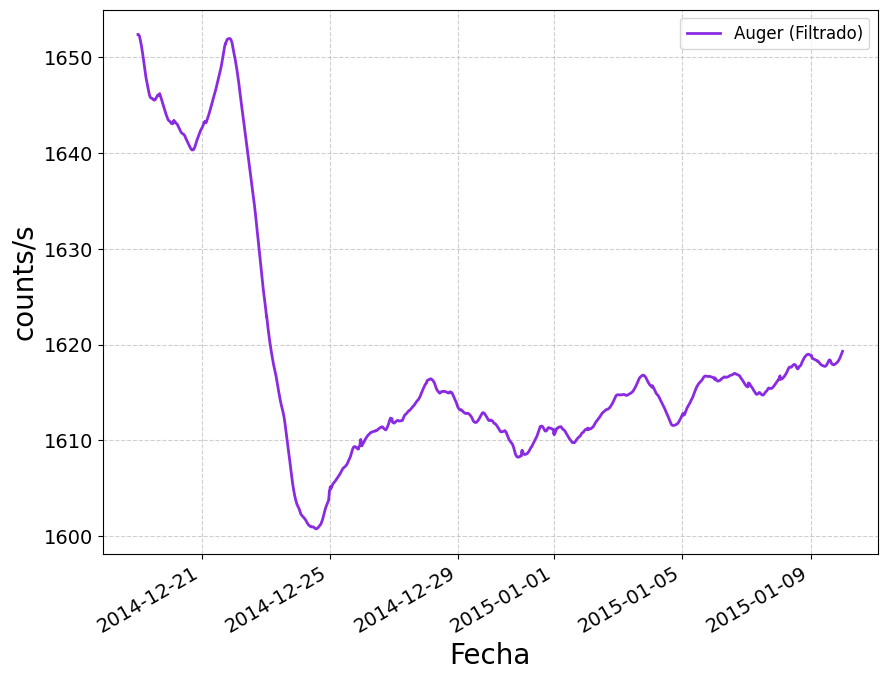

In [11]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2014-12-19"
end_date = "2015-01-10"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=20)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=20)  # Nombre del eje vertical con fuente más grande

plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

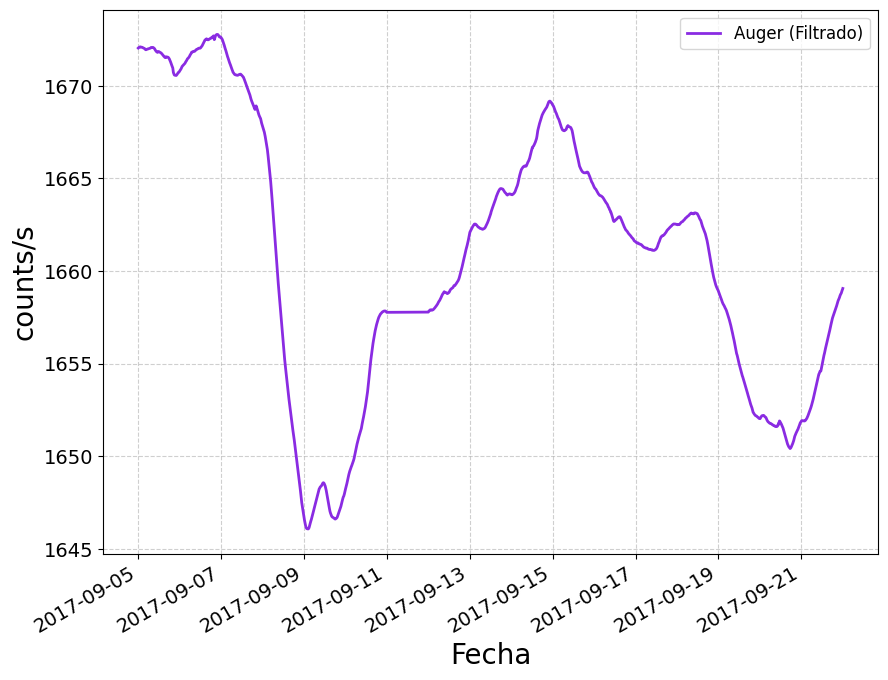

In [12]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2017-09-05"
end_date = "2017-09-22"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=20)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=20)  # Nombre del eje vertical con fuente más grande

plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

### ¿Cómo lucen los Forbush con magnitudes entre 0 y 1?

In [13]:
filtered_forbush_01 = forbush_auger.loc[forbush_auger['MagnM'] <= 1]
filtered_forbush_01

,date,MagnM,Otype,Qs
1,2006-07-27 13:53:00,1.0,1,4.0
2,2006-08-07 00:35:00,0.9,1,4.0
5,2006-12-16 17:55:00,0.8,1,4.0
6,2006-12-18 10:14:00,0.9,1,4.0
9,2007-10-25 11:35:00,0.9,1,4.0
11,2008-01-31 11:23:00,0.6,1,4.0
12,2008-04-30 15:57:00,1.0,1,4.0
14,2008-09-30 12:34:00,1.0,1,4.0
15,2008-11-15 16:25:00,0.7,1,4.0
18,2009-03-03 06:02:00,0.4,1,4.0


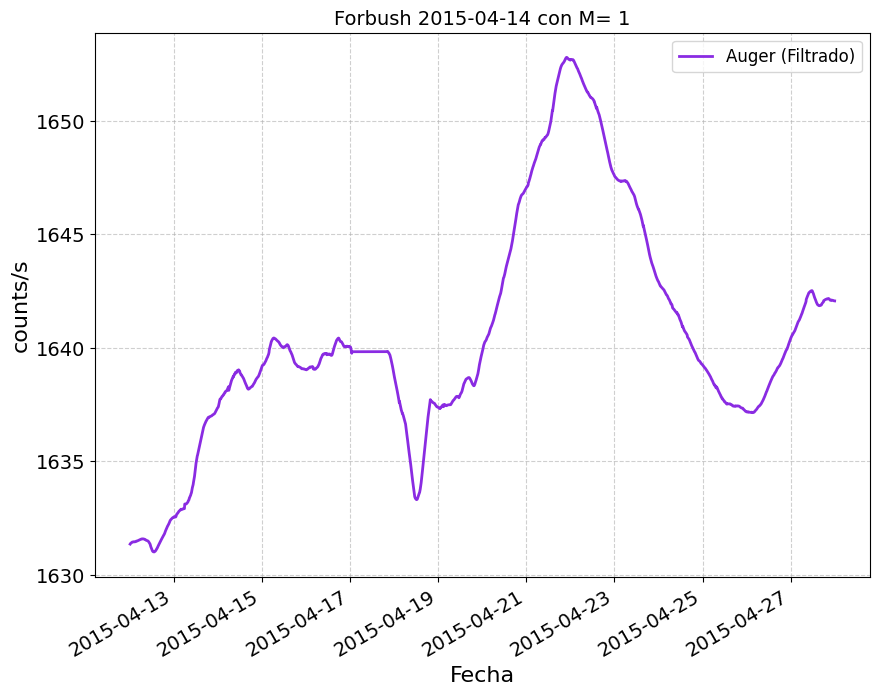

In [14]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2015-04-12"
end_date = "2015-04-28"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=16)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=16)  # Nombre del eje vertical con fuente más grande
plt.title('Forbush 2015-04-14 con M= 1')
plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

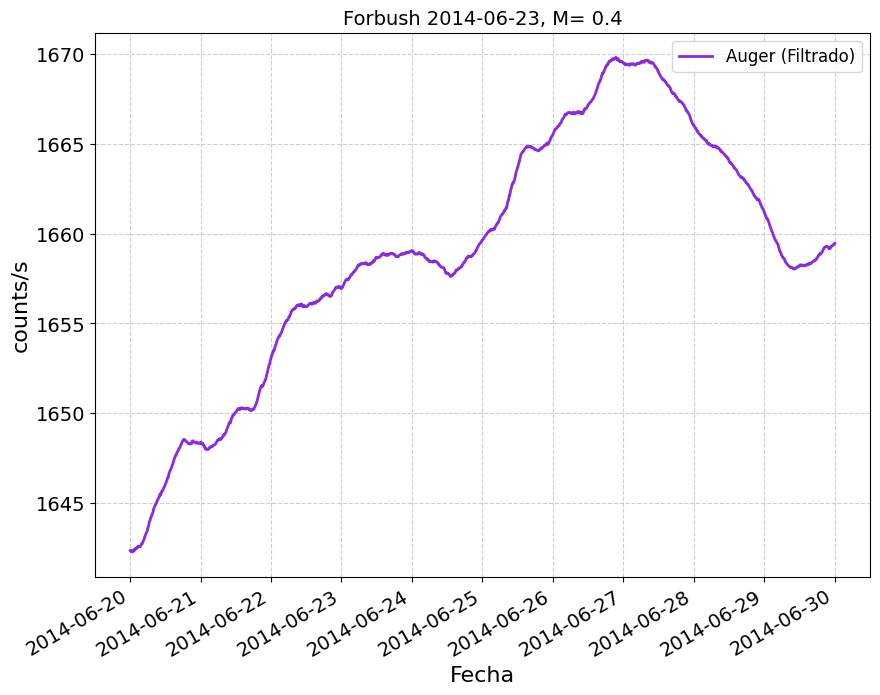

In [15]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2014-06-20"
end_date = "2014-06-30"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=16)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=16)  # Nombre del eje vertical con fuente más grande
plt.title('Forbush 2014-06-23, M= 0.4')
plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

In [16]:
filtered_forbush_01 = forbush_auger.loc[forbush_auger['MagnM'] <= 1]
filtered_forbush_01

,date,MagnM,Otype,Qs
1,2006-07-27 13:53:00,1.0,1,4.0
2,2006-08-07 00:35:00,0.9,1,4.0
5,2006-12-16 17:55:00,0.8,1,4.0
6,2006-12-18 10:14:00,0.9,1,4.0
9,2007-10-25 11:35:00,0.9,1,4.0
11,2008-01-31 11:23:00,0.6,1,4.0
12,2008-04-30 15:57:00,1.0,1,4.0
14,2008-09-30 12:34:00,1.0,1,4.0
15,2008-11-15 16:25:00,0.7,1,4.0
18,2009-03-03 06:02:00,0.4,1,4.0


#### ¿Qué fracción de todos los forbush están entre los años 2012 y 2015 del total?

In [17]:
import pandas as pd

# Supongamos que tienes el DataFrame 'forbush_auger'
# forbush_auger = ...

# Convertir la columna 'Date' a tipo datetime
forbush_auger['date'] = pd.to_datetime(forbush_auger['date'])

# Definir el rango de años (2013 a 2015)
start_year = 2012
end_year = 2015

# Filtrar el DataFrame para incluir solo las filas en el rango de años
filtered_forbush_auger = forbush_auger[(forbush_auger['date'].dt.year >= start_year) & (forbush_auger['date'].dt.year <= end_year)]

# Calcular el porcentaje de datos en el rango de años con respecto al total
percentage = (len(filtered_forbush_auger) / len(forbush_auger)) * 100

print(f"Porcentaje de datos entre {start_year} y {end_year}: {percentage:.2f}%")


Porcentaje de datos entre 2012 y 2015: 55.41%


#### ¿Qué fracción de todos los forbush entre los años 2012 y 2015 tienen una magnitud mayor a 2?

In [18]:
import pandas as pd

# Supongamos que tienes el DataFrame 'forbush_auger'
# forbush_auger = ...

# Convertir la columna 'Date' a tipo datetime
forbush_auger['date'] = pd.to_datetime(forbush_auger['date'])

# Definir el rango de años (2013 a 2015)
start_year = 2012
end_year = 2015

# Filtrar el DataFrame para incluir solo las filas en el rango de años y con magnitud mayor a 2
filtered_forbush_auger = forbush_auger[(forbush_auger['date'].dt.year >= start_year) & (forbush_auger['date'].dt.year <= end_year) & (forbush_auger['MagnM'] > 2)]

# Calcular el porcentaje de datos en el rango de años y con magnitud mayor a 2 con respecto al total
percentage = (len(filtered_forbush_auger) / len(forbush_auger)) * 100

print(f"Porcentaje de datos entre {start_year} y {end_year} con MagnM > 2: {percentage:.2f}%")


Porcentaje de datos entre 2012 y 2015 con MagnM > 2: 28.38%


#### ¿Qué fracción de todos los forbush tienen una magnitud mayor a 2?

In [19]:
# Supongamos que tienes el DataFrame 'forbush_auger'
# forbush_auger = ...

# Filtrar el DataFrame para incluir solo las filas con magnitud mayor a 2
filtered_forbush_auger = forbush_auger[forbush_auger['MagnM'] > 2]

# Calcular el porcentaje de datos con magnitud mayor a 2 con respecto al total
percentage = (len(filtered_forbush_auger) / len(forbush_auger)) * 100

print(f"Porcentaje de datos con MagnM > 2: {percentage:.2f}%")


Porcentaje de datos con MagnM > 2: 39.86%


#### ¿Cómo lucen los Forbush de magnitud ~2?

In [22]:
import pandas as pd

# Convertir la columna 'Date' a tipo datetime
forbush_auger['date'] = pd.to_datetime(forbush_auger['date'])

# Definir el rango de años (2013 a 2015)
start_year = 2012
end_year = 2015

# Filtrar el DataFrame para incluir solo las filas en el rango de años y con magnitud mayor a 2
filtered_forbush_auger = forbush_auger[(forbush_auger['date'].dt.year >= start_year) & (forbush_auger['date'].dt.year <= end_year) & (forbush_auger['MagnM'] > 2)]


In [23]:
filtered_forbush_26 = forbush_auger.loc[(forbush_auger['MagnM'] >= 2) & (forbush_auger['MagnM'] <= 6)]
filtered_forbush_26

,date,MagnM,Otype,Qs
0,2006-07-09 21:36:00,3.8,1,4.0
26,2010-04-05 08:26:00,3.1,1,4.0
28,2010-05-28 02:57:00,2.7,1,4.0
29,2010-08-03 17:41:00,3.7,1,4.0
34,2011-02-18 01:30:00,4.7,1,4.0
35,2011-03-10 06:45:00,3.0,1,4.0
36,2011-03-29 16:30:00,2.9,1,4.0
37,2011-04-01 16:48:00,2.2,1,4.0
39,2011-06-04 20:44:00,3.4,1,4.0
40,2011-08-05 17:51:00,4.8,1,4.0


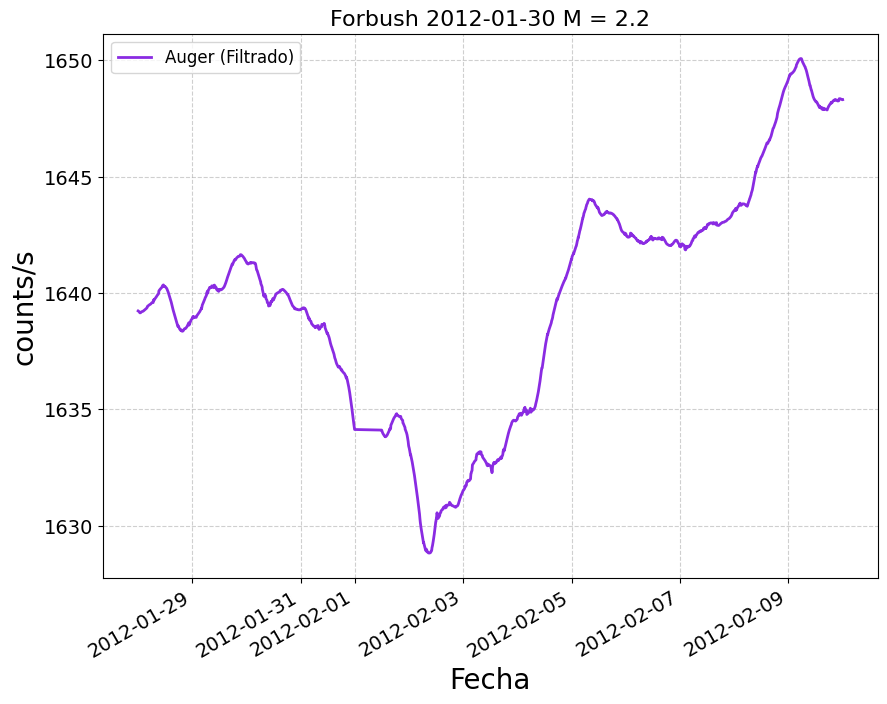

In [24]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2012-01-28"
end_date = "2012-02-10"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=20)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=20)  # Nombre del eje vertical con fuente más grande
plt.title('Forbush 2012-01-30 M = 2.2', fontsize=16)

plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

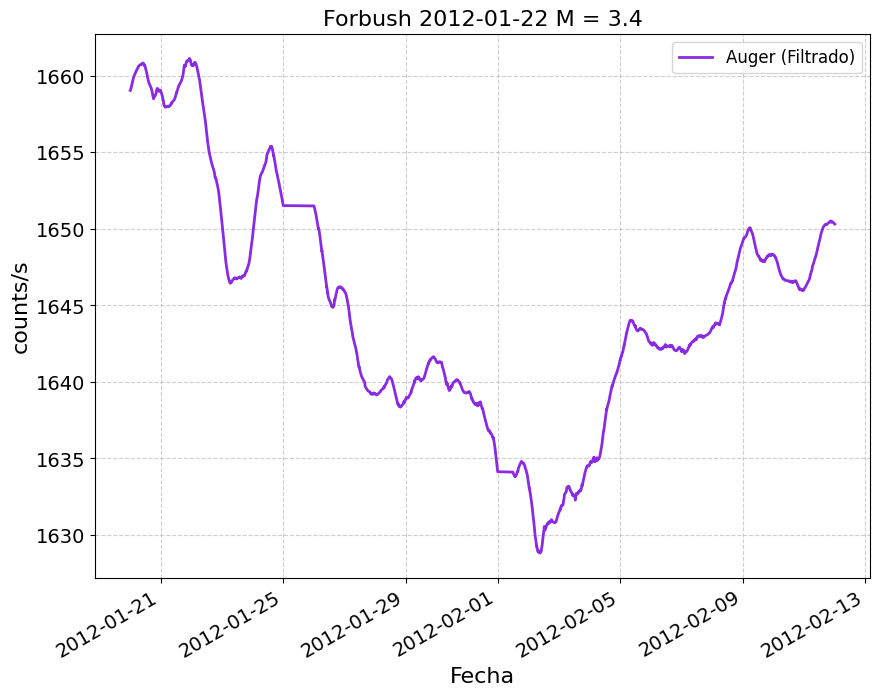

In [25]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2012-01-20"
end_date = "2012-02-12"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=16)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=16)  # Nombre del eje vertical con fuente más grande
plt.title('Forbush 2012-01-22 M = 3.4', fontsize=16)

plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

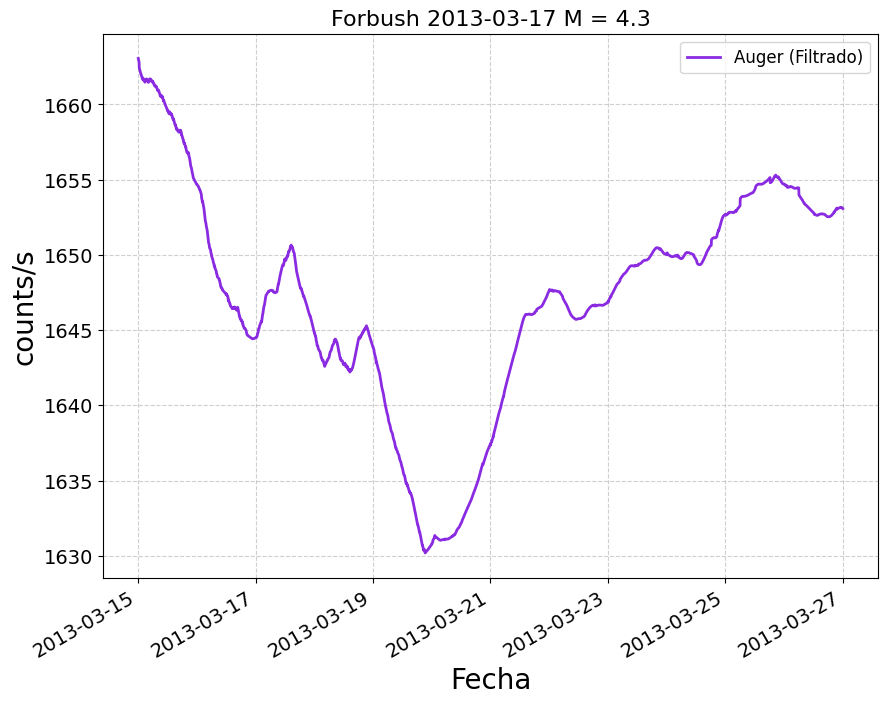

In [26]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2013-03-15"
end_date = "2013-03-27"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=20)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=20)  # Nombre del eje vertical con fuente más grande
plt.title('Forbush 2013-03-17 M = 4.3', fontsize=16)

plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

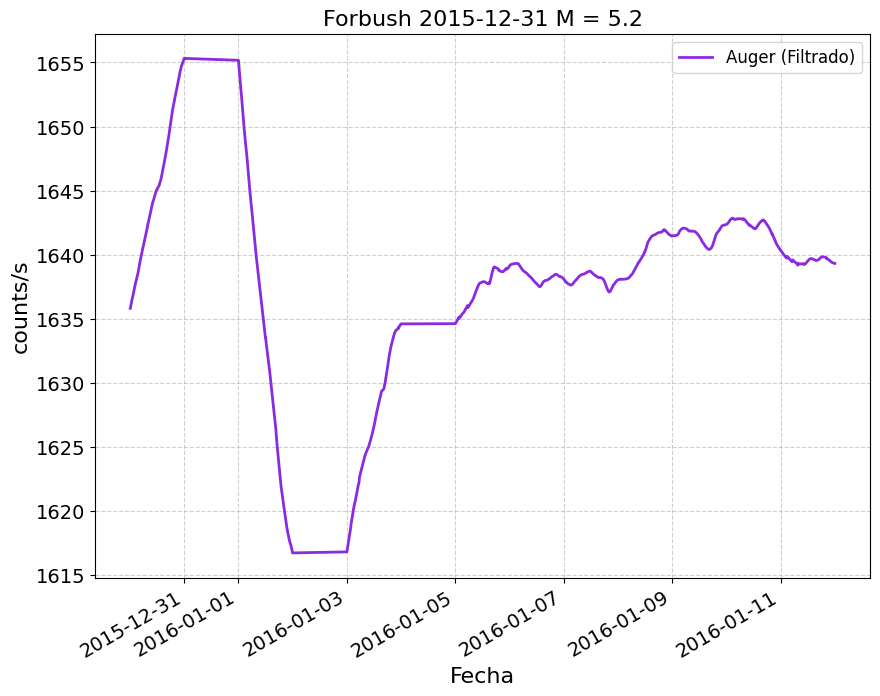

In [27]:
import matplotlib.pyplot as plt

# Supongamos que tienes los DataFrames 'filtered_scaler300s' y 'scaler300s'
# filtered_scaler300s = ...
# scaler300s = ...

# Filtrar las fechas para el rango que deseas comparar
start_date = "2015-12-30"
end_date = "2016-01-12"

filtered_scaler_smooth = scaler_smooth[(scaler_smooth['Date'] >= start_date) & (scaler_smooth['Date'] <= end_date)]
filtered_scaler300s = scaler300s[(scaler300s['Date'] >= start_date) & (scaler300s['Date'] <= end_date)]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

#plt.scatter(filtered_scaler300s['Date'], filtered_scaler300s['ScalerCorr'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.3)
plt.plot(filtered_scaler_smooth['Date'], filtered_scaler_smooth['ScalerCorr'], color='blueviolet', linewidth=2, label='Auger (Filtrado)')

plt.xlabel('Fecha', fontsize=16)  # Nombre del eje horizontal con fuente más grande
plt.ylabel('counts/s', fontsize=16)  # Nombre del eje vertical con fuente más grande
plt.title('Forbush 2015-12-31 M = 5.2', fontsize=16)

plt.xticks(fontsize=14)  # Tamaño de fuente para los números del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para los números del eje y

plt.grid(True, linestyle='--', alpha=0.6)  # Agregar una grilla estética con líneas punteadas

plt.gcf().autofmt_xdate()

plt.legend()
plt.show()

### Identificación de porcentajes de decrecimiento...

In [31]:
import pandas as pd

fall_events = []
start_date = None
end_date = None
percentage_threshold = 0.5  # Umbral del 5%

# Recorrer los datos
for index, row in scaler_smooth.iterrows():
    current_date = row['Date']
    current_value = row['ScalerCorr']
    
    # Calcular la diferencia porcentual con respecto al día anterior
    if start_date is not None:
        percentage_change = (current_value - prev_value) / prev_value
        if percentage_change <= -percentage_threshold:
            if start_date is None:
                start_date = current_date
            end_date = current_date
        else:
            # Verificar si se cumple el criterio de al menos 5 días
            if (end_date - start_date).days >= 6:
                fall_events.append((start_date, end_date))
            start_date = None
            end_date = None
    
    prev_value = current_value

# Imprimir los eventos de caídas súbitas
if fall_events:
    print("Eventos de caídas súbitas de al menos 5% en al menos 5 días:")
    for event in fall_events:
        print(f"Fecha de inicio: {event[0]}, Fecha de fin: {event[1]}")
else:
    print("No se encontraron eventos de caídas súbitas que cumplan con los criterios.")


No se encontraron eventos de caídas súbitas que cumplan con los criterios.
